# ...in Python

## CAS Common Chemistry API in Python

by Vincent Scalfani

These recipe examples were tested on March 23, 2022.

**CAS Common Chemistry API Documentation (requires registration):** https://www.cas.org/services/commonchemistry-api

**Attribution:** This tutorial uses the [CAS Common Chemistry](https://commonchemistry.cas.org/) API. Example data shown is licensed under the [CC BY-NC 4.0 license](https://creativecommons.org/licenses/by-nc/4.0/).


### 1. Common Chemistry Record Detail Retrieval

Information about substances in CAS Common Chemistry can be retrieved using the `/detail` API and a CAS RN identifier:

#### Import libraries

In [1]:
import json
import requests
from pprint import pprint

#### Setup API parameters

In [2]:
detail_base_url = "https://commonchemistry.cas.org/api/detail?"
casrn1 = "10094-36-7" # ethyl cyclohexanepropionate

#### Request data from CAS Common Chemistry Detail API

In [3]:
casrn1_data = requests.get(detail_base_url + "cas_rn=" + casrn1).json()
pprint(casrn1_data)

{'canonicalSmile': 'O=C(OCC)CCC1CCCCC1',
 'experimentalProperties': [{'name': 'Boiling Point',
                             'property': '105-113 °C @ Press: 17 Torr',
                             'sourceNumber': 1}],
 'hasMolfile': True,
 'image': '<svg width="228.6" viewBox="0 0 7620 3716" text-rendering="auto" '
          'stroke-width="1" stroke-opacity="1" stroke-miterlimit="10" '
          'stroke-linejoin="miter" stroke-linecap="square" '
          'stroke-dashoffset="0" stroke-dasharray="none" stroke="black" '
          'shape-rendering="auto" image-rendering="auto" height="111.48" '
          'font-weight="normal" font-style="normal" font-size="12" '
          'font-family="\'Dialog\'" fill-opacity="1" fill="black" '
          'color-rendering="auto" color-interpolation="auto" '
          'xmlns="http://www.w3.org/2000/svg"><g><g stroke="white" '
          'fill="white"><rect y="0" x="0" width="7620" stroke="none" '
          'height="3716"/></g><g transform="translate(32866,32

#### Display the Molecule Drawing

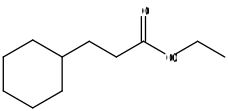

In [4]:
# get svg image text
svg_string1 = casrn1_data["image"]

# display the molecule
from IPython.display import SVG
SVG(svg_string1)

#### Select some specific data

In [5]:
# Get Experimental Properties
casrn1_data["experimentalProperties"][0]

{'name': 'Boiling Point',
 'property': '105-113 °C @ Press: 17 Torr',
 'sourceNumber': 1}

In [6]:
# Get Boiling Point property
casrn1_data["experimentalProperties"][0]["property"]

'105-113 °C @ Press: 17 Torr'

In [7]:
# Get InChIKey
casrn1_data["inchiKey"]

'InChIKey=NRVPMFHPHGBQLP-UHFFFAOYSA-N'

In [8]:
# Get Canonical SMILES
casrn1_data["canonicalSmile"]

'O=C(OCC)CCC1CCCCC1'

### 2. Common Chemistry API record detail retrieval in a loop

#### Import libraries

In [9]:
import json
import requests
from pprint import pprint
from time import sleep

#### Setup API parameters

In [10]:
detail_base_url = "https://commonchemistry.cas.org/api/detail?"
casrn_list = ["10094-36-7", "10031-92-2", "10199-61-8", "10036-21-2", "1019020-13-3"]

#### Request data for each CAS RN and save to a list

In [11]:
casrn_data = []
for casrn in casrn_list:
    casrn_data.append(requests.get(detail_base_url + "cas_rn=" + casrn).json())
    sleep(1) # add a delay between API calls

In [12]:
casrn_data[0:2] # vew first 2

[{'canonicalSmile': 'O=C(OCC)CCC1CCCCC1',
  'experimentalProperties': [{'name': 'Boiling Point',
    'property': '105-113 °C @ Press: 17 Torr',
    'sourceNumber': 1}],
  'hasMolfile': True,
  'image': '<svg width="228.6" viewBox="0 0 7620 3716" text-rendering="auto" stroke-width="1" stroke-opacity="1" stroke-miterlimit="10" stroke-linejoin="miter" stroke-linecap="square" stroke-dashoffset="0" stroke-dasharray="none" stroke="black" shape-rendering="auto" image-rendering="auto" height="111.48" font-weight="normal" font-style="normal" font-size="12" font-family="\'Dialog\'" fill-opacity="1" fill="black" color-rendering="auto" color-interpolation="auto" xmlns="http://www.w3.org/2000/svg"><g><g stroke="white" fill="white"><rect y="0" x="0" width="7620" stroke="none" height="3716"/></g><g transform="translate(32866,32758)" text-rendering="geometricPrecision" stroke-width="44" stroke-linejoin="round" stroke-linecap="round"><line y2="-30850" y1="-31419" x2="-30792" x1="-31777" fill="none"/><l

#### Display Molecule Drawings

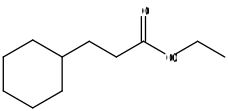

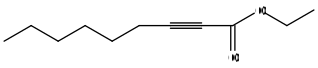

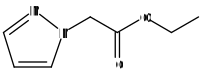

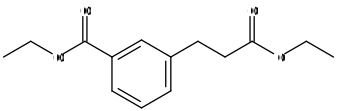

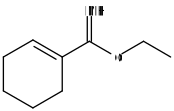

In [13]:
from IPython.display import SVG
# get svg image text
svg_strings = []
for svg_idx in range(len(casrn_data)):
    svg_strings.append(casrn_data[svg_idx]["image"])

# display the molecules
for svg_string in svg_strings:
    display(SVG(svg_string))

#### Select some specific data

In [14]:
# Get canonical SMILES
cansmiles = []
for cansmi in range(len(casrn_data)):
    cansmiles.append(casrn_data[cansmi]["canonicalSmile"])
print(cansmiles)

['O=C(OCC)CCC1CCCCC1', 'O=C(C#CCCCCCC)OCC', 'O=C(OCC)CN1N=CC=C1', 'O=C(OCC)C1=CC=CC(=C1)CCC(=O)OCC', 'N=C(OCC)C1=CCCCC1']


In [15]:
# Get synonyms
synonyms_list = []
for syn in range(len(casrn_data)):
    synonyms_list.append(casrn_data[syn]["synonyms"])
pprint(synonyms_list)

[['Cyclohexanepropanoic acid, ethyl ester',
  'Cyclohexanepropionic acid, ethyl ester',
  'Ethyl cyclohexanepropionate',
  'Ethyl cyclohexylpropanoate',
  'Ethyl 3-cyclohexylpropionate',
  'Ethyl 3-cyclohexylpropanoate',
  '3-Cyclohexylpropionic acid ethyl ester',
  'NSC 71463',
  'Ethyl 3-cyclohexanepropionate'],
 ['2-Nonynoic acid, ethyl ester', 'Ethyl 2-nonynoate', 'NSC 190985'],
 ['1<em>H</em>-Pyrazole-1-acetic acid, ethyl ester',
  'Pyrazole-1-acetic acid, ethyl ester',
  'Ethyl 1<em>H</em>-pyrazole-1-acetate',
  'Ethyl 1-pyrazoleacetate',
  'Ethyl 2-(1<em>H</em>-pyrazol-1-yl)acetate'],
 ['Benzenepropanoic acid, 3-(ethoxycarbonyl)-, ethyl ester',
  'Hydrocinnamic acid, <em>m</em>-carboxy-, diethyl ester',
  'Ethyl 3-(ethoxycarbonyl)benzenepropanoate'],
 ['1-Cyclohexene-1-carboximidic acid, ethyl ester',
  'Ethyl 1-cyclohexene-1-carboximidate']]


In [16]:
# Transform synonym "list of lists" to a flat list
synonyms_flat = []
for sublist in synonyms_list:
    for synonym in sublist:
        synonyms_flat.append(synonym)    
pprint(synonyms_flat)

['Cyclohexanepropanoic acid, ethyl ester',
 'Cyclohexanepropionic acid, ethyl ester',
 'Ethyl cyclohexanepropionate',
 'Ethyl cyclohexylpropanoate',
 'Ethyl 3-cyclohexylpropionate',
 'Ethyl 3-cyclohexylpropanoate',
 '3-Cyclohexylpropionic acid ethyl ester',
 'NSC 71463',
 'Ethyl 3-cyclohexanepropionate',
 '2-Nonynoic acid, ethyl ester',
 'Ethyl 2-nonynoate',
 'NSC 190985',
 '1<em>H</em>-Pyrazole-1-acetic acid, ethyl ester',
 'Pyrazole-1-acetic acid, ethyl ester',
 'Ethyl 1<em>H</em>-pyrazole-1-acetate',
 'Ethyl 1-pyrazoleacetate',
 'Ethyl 2-(1<em>H</em>-pyrazol-1-yl)acetate',
 'Benzenepropanoic acid, 3-(ethoxycarbonyl)-, ethyl ester',
 'Hydrocinnamic acid, <em>m</em>-carboxy-, diethyl ester',
 'Ethyl 3-(ethoxycarbonyl)benzenepropanoate',
 '1-Cyclohexene-1-carboximidic acid, ethyl ester',
 'Ethyl 1-cyclohexene-1-carboximidate']


#### Create a dataset with Pandas

In [ ]:
import numpy as np
import pandas as pd

df = pd.json_normalize(casrn_data)
df_subset = df[["uri", "rn", "name", "inchiKey", "canonicalSmile", "molecularMass"]]

### 3. Common Chemistry Search

In addition to the `/detail` API, the CAS Common Chemistry API has a `/search` method that allows searching by CAS RN, SMILES, InChI/InChIKey, and name.  

#### Import libraries



In [18]:
import json
import requests
from pprint import pprint
from time import sleep

#### Setup API Parameters

In [19]:
search_base_url = "https://commonchemistry.cas.org/api/search?q="

# InChIKey for Quinine
IK = "InChIKey=LOUPRKONTZGTKE-WZBLMQSHSA-N"

#### Request data from CAS Common Chemistry Search API

In [20]:
# search query
quinine_search_data = requests.get(search_base_url + IK).json()
pprint(quinine_search_data)

{'count': 1,
 'results': [{'image': '<svg width="309.3" viewBox="0 0 10310 5592" '
                       'text-rendering="auto" stroke-width="1" '
                       'stroke-opacity="1" stroke-miterlimit="10" '
                       'stroke-linejoin="miter" stroke-linecap="square" '
                       'stroke-dashoffset="0" stroke-dasharray="none" '
                       'stroke="black" shape-rendering="auto" '
                       'image-rendering="auto" height="167.76" '
                       'font-weight="normal" font-style="normal" '
                       'font-size="12" font-family="\'Dialog\'" '
                       'fill-opacity="1" fill="black" color-rendering="auto" '
                       'color-interpolation="auto" '
                       'xmlns="http://www.w3.org/2000/svg"><g><g '
                       'stroke="white" fill="white"><rect y="0" x="0" '
                       'width="10310" stroke="none" height="5592"/></g><g '
                       'trans

Note that with the CAS Common Chemistry Search API, only the image data, name, and CAS RN is returned. In order to retrieve the full record, we can combine our search with the related detail API:

In [21]:
# search query
quinine_search_data = requests.get(search_base_url + IK).json()

# extract our CAS RN
quinine_rn = quinine_search_data["results"][0]["rn"]
print(quinine_rn)

130-95-0


In [22]:
# get detailed record for quinine
detail_base_url = "https://commonchemistry.cas.org/api/detail?"
quinine_detail_data = requests.get(detail_base_url + "cas_rn=" + quinine_rn).json()
pprint(quinine_detail_data)

{'canonicalSmile': 'OC(C=1C=CN=C2C=CC(OC)=CC21)C3N4CCC(C3)C(C=C)C4',
 'experimentalProperties': [{'name': 'Melting Point',
                             'property': '57 °C',
                             'sourceNumber': 1}],
 'hasMolfile': True,
 'image': '<svg width="309.3" viewBox="0 0 10310 5592" text-rendering="auto" '
          'stroke-width="1" stroke-opacity="1" stroke-miterlimit="10" '
          'stroke-linejoin="miter" stroke-linecap="square" '
          'stroke-dashoffset="0" stroke-dasharray="none" stroke="black" '
          'shape-rendering="auto" image-rendering="auto" height="167.76" '
          'font-weight="normal" font-style="normal" font-size="12" '
          'font-family="\'Dialog\'" fill-opacity="1" fill="black" '
          'color-rendering="auto" color-interpolation="auto" '
          'xmlns="http://www.w3.org/2000/svg"><g><g stroke="white" '
          'fill="white"><rect y="0" x="0" width="10310" stroke="none" '
          'height="5592"/></g><g transform="translate(

#### Handle multiple results

In [23]:
# setup search query parameters
search_base_url = "https://commonchemistry.cas.org/api/search?q="
# SMILES for butadiene
smi_bd = "C=CC=C"

In [24]:
# Request data from CAS Common Chemistry Search API
smi_search_data = requests.get(search_base_url + smi_bd).json()

In [25]:
# get results count
print(smi_search_data["count"])

7


In [26]:
# extract out CAS RNs
smi_casrn_list = []
for casrn_idx in range(len(smi_search_data["results"])):
    smi_casrn_list.append(smi_search_data["results"][casrn_idx]["rn"])
print(smi_casrn_list)

['106-99-0', '16422-75-6', '26952-74-9', '29406-96-0', '29989-19-3', '31567-90-5', '9003-17-2']


In [27]:
# now use the detail API to retrieve the full records
detail_base_url = "https://commonchemistry.cas.org/api/detail?"
smi_detail_data = []
for casrn in smi_casrn_list:
    smi_detail_data.append(requests.get(detail_base_url + "cas_rn=" + casrn).json())
    sleep(1) # add a delay between API calls

In [28]:
# Get some specific data such as name from the detail records
names = []
for name_idx in range(len(smi_detail_data)):
    names.append(smi_detail_data[name_idx]["name"])
print(names)

['1,3-Butadiene', 'Butadiene trimer', 'Butadiene dimer', '1,3-Butadiene, homopolymer, isotactic', '1,3-Butadiene-<em>1</em>,<em>1</em>,<em>2</em>,<em>3</em>,<em>4</em>,<em>4</em>-<em>d</em><sub>6</sub>, homopolymer', 'Syndiotactic polybutadiene', 'Polybutadiene']


#### Handle multiple page results

The CAS Common Chemistry API returns 50 results per page, and only the first page is returned by default. If the search returns more than 50 results, the offset option can be added to page through and obtain all results:

In [29]:
# setup search query parameters
search_base_url = "https://commonchemistry.cas.org/api/search?q="
n = "selen*"

In [30]:
# get results count for CAS Common Chemistry Search
num_Results = requests.get(search_base_url + n).json()["count"]
print(num_Results)

191


In [31]:
# Request data and save to a list in a loop for each page
n_search_data = []
for page_idx in range(int(num_Results/50 +1)): # creates [0,1,2,3] for 4 pages
    page_data = requests.get(search_base_url + n + "&offset=" + str(page_idx*50)).json()
    sleep(1)
    n_search_data.append(page_data)

In [32]:
# length of search data includes a top level list for each query
len(n_search_data)

4

In [33]:
# lists within lists contain the results
print(len(n_search_data[0]["results"]))
print(len(n_search_data[1]["results"]))
print(len(n_search_data[2]["results"]))
print(len(n_search_data[3]["results"]))

50
50
50
41


In [34]:
# We can index and extract out the first casrn like this
pprint(n_search_data[0]["results"][0]["rn"])

'10025-68-0'


In [35]:
# extract out all CAS RNs from the list of lists
n_casrn_list = []
for n_idx in range(len(n_search_data)): # top level list
    for casrn_idx in range(len(n_search_data[n_idx]["results"])): # lists within top level
        n_casrn_list.append(n_search_data[n_idx]["results"][casrn_idx]["rn"])

In [36]:
len(n_casrn_list)

191

In [37]:
# show first 20
pprint(n_casrn_list[0:20])

['10025-68-0',
 '10026-03-6',
 '10026-23-0',
 '10101-96-9',
 '10102-18-8',
 '10102-23-5',
 '10112-94-4',
 '10161-84-9',
 '10214-40-1',
 '10236-58-5',
 '10326-29-1',
 '10431-47-7',
 '1049-38-3',
 '106325-35-3',
 '1069-66-5',
 '109428-24-2',
 '1187-56-0',
 '1190006-10-0',
 '1197228-15-1',
 '12033-59-9']


In [38]:
# now we can loop through each casrn and use the detail API to obtain the entire record
# this will query CAS Common Chem 191 times and take ~ 5 min.
detail_base_url = "https://commonchemistry.cas.org/api/detail?"
n_detail_data = []
for casrn in n_casrn_list:
    n_detail_data.append(requests.get(detail_base_url + "cas_rn=" + casrn).json())
    sleep(1) # add a delay between API calls

In [39]:
# Extract out some data such as molecularMass
mms = []
for mm_idx in range(len(n_detail_data)):
    mms.append(n_detail_data[mm_idx]["molecularMass"])

In [40]:
len(mms)

191

In [41]:
# view first 20
# note that several do not have molecularMass values and have an empty string in the record
print(mms[0:20])

['228.83', '220.77', '', '', '', '', '', '300.24', '', '168.05', '', '', '', '', '', '241.11', '', '368.25', '265.00', '']


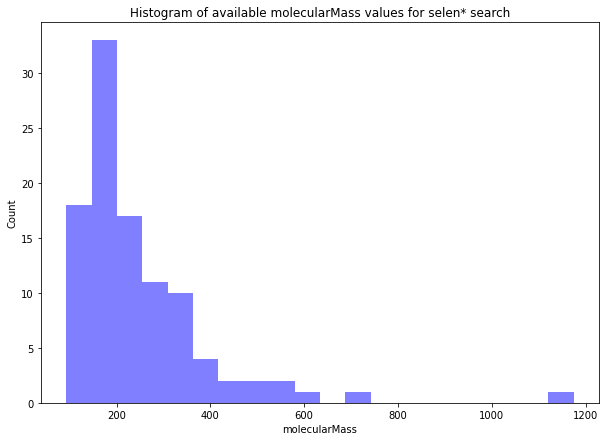

In [42]:
# finally, we can even quickly create a simple visualization from the
# extracted molecularMass values (from the selen* search)

# remove empty strings
mms_values = list(filter(None, mms))

# convert to floats
mms_values_float = []
for mms_value in mms_values:
    mms_values_float.append(float(mms_value))  

# import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# plot data
plt.figure(figsize=(10,7))
plt.hist(mms_values_float, histtype='bar',bins = 20, facecolor="blue", alpha=0.5)
plt.title("Histogram of available molecularMass values for selen* search")
plt.xlabel("molecularMass")
plt.ylabel("Count")
plt.show()